In [3]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import seaborn as sns

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [4]:
dados = pd.read_excel('/content/Eventos2024.xlsx')

In [5]:
dados.head()

,Name,EventTypeId,CompanyId,FranchiseId,StartDate,EndDate,Objective,Status,Format,City,Localization,Budget
0,Encontro de Inovações Farmacêuticas,1,4,2,2024-01-10 09:00:00,2024-01-10 12:30:00,Atualizar farmacêuticos,1,0,RJ,"Rua dos Laboratórios, 250",85000
1,Congresso Nacional de Saúde Pública,2,3,1,2024-02-05 08:00:00,2024-02-05 16:00:00,Promover saúde pública,0,2,SP,"Av. Brasil, 123",67000
2,Simpósio de Terapias Oncológicas,3,1,3,2024-03-15 14:00:00,2024-03-15 18:00:00,Compartilhar novas terapias,2,1,MG,"Rua da Cura, 55",92000
3,Feira Internacional de Equipamentos Médicos,5,5,6,2024-04-20 09:30:00,2024-04-20 17:00:00,Expor novas tecnologias,1,0,PR,"Av. Internacional, 780",110000
4,Celebração de 10 Anos de Excelência Médica,4,2,4,2024-05-18 19:00:00,2024-05-18 23:00:00,Comemorar conquistas,2,0,BA,"Av. dos Homenageados, 100",105000


In [6]:
dados.tail()

,Name,EventTypeId,CompanyId,FranchiseId,StartDate,EndDate,Objective,Status,Format,City,Localization,Budget
7,Fórum de Discussões em Oncologia,2,1,2,2024-08-12 10:00:00,2024-08-12 16:00:00,Discutir casos complexos,2,0,RJ,"Rua da Discussão, 85",60000
8,Workshop de Cuidados Pediátricos,3,5,5,2024-09-25 14:00:00,2024-09-25 18:00:00,Capacitar profissionais,0,1,MG,"Rua do Cuidado, 315",45000
9,Exposição de Avanços Dermatológicos,5,4,4,2024-10-30 09:00:00,2024-10-30 14:30:00,Expor novos tratamentos,3,0,SC,"Av. Beleza, 160",40000
10,Congresso de Doenças Crônicas,2,2,1,2024-11-15 08:00:00,2024-11-15 17:00:00,Discutir doenças crônicas,0,2,SP,"Av. Vida, 750",115000
11,Feira de Soluções Endocrinológicas,5,3,6,2024-12-02 09:00:00,2024-12-02 15:00:00,Expor novas soluções,1,0,PR,"Rua Saúde, 420",98000


In [8]:
dados.describe()

,EventTypeId,CompanyId,FranchiseId,StartDate,EndDate,Status,Format,Budget
count,12.000000,12.000000,12.000000,12,12,12.000000,12.000000,12.000000
mean,3.000000,3.083333,3.583333,2024-06-30 17:12:30,2024-06-30 22:42:30,1.083333,0.750000,77666.666667
min,1.000000,1.000000,1.000000,2024-01-10 09:00:00,2024-01-10 12:30:00,0.000000,0.000000,38000.000000
25%,2.000000,2.000000,2.000000,2024-04-11 10:37:30,2024-04-11 17:15:00,0.000000,0.000000,56250.000000
50%,3.000000,3.000000,3.500000,2024-06-29 00:30:00,2024-06-29 04:45:00,1.000000,0.500000,81000.000000
75%,4.250000,4.000000,5.250000,2024-10-04 06:45:00,2024-10-04 11:07:30,2.000000,1.250000,99750.000000
max,5.000000,5.000000,6.000000,2024-12-02 09:00:00,2024-12-02 15:00:00,3.000000,2.000000,115000.000000
std,1.477098,1.378954,1.880925,NaN,NaN,0.996205,0.866025,27542.804153


In [9]:
dados.columns

Index(['Name', 'EventTypeId', 'CompanyId', 'FranchiseId', 'StartDate',
       'EndDate', 'Objective', 'Status', 'Format', 'City', 'Localization',
       'Budget'],
      dtype='object')

In [10]:
dados.shape

(12, 12)

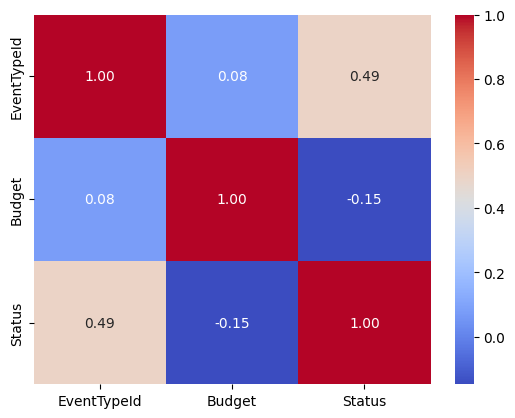

In [12]:
corr_matrix = dados[['EventTypeId', 'Budget', 'Status']].corr()
corr_matrix
# Gerando um heatmap com seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

<Axes: ylabel='Frequency'>

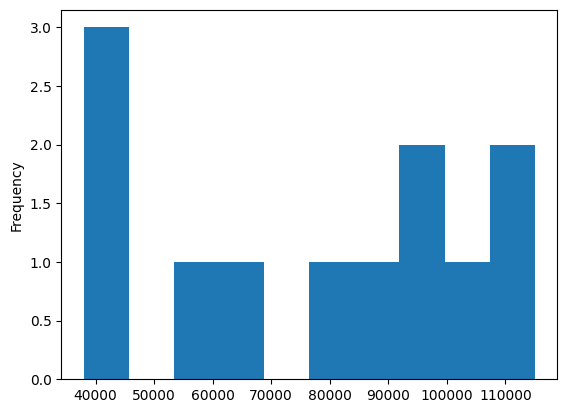

In [13]:
dados["Budget"].plot(kind='hist')

In [14]:
dados["Budget"].median()

81000.0

<Axes: ylabel='Budget'>

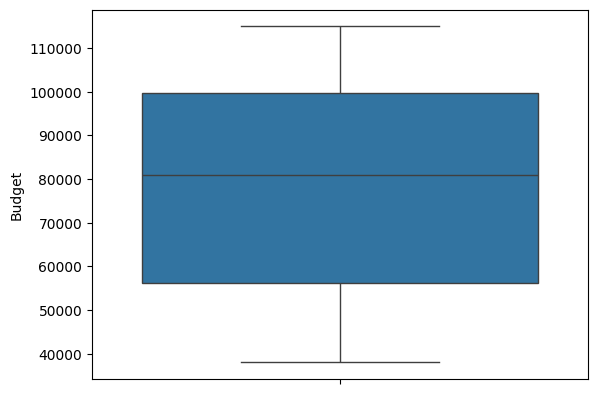

In [15]:

sns.boxplot(dados["Budget"])

In [17]:
medias_por_status = dados.groupby("Status")["Budget"].mean()
medias_por_status

,Budget
Status,
0,76000.000000
1,82750.000000
2,85666.666667
3,40000.000000


<Axes: ylabel='Frequency'>

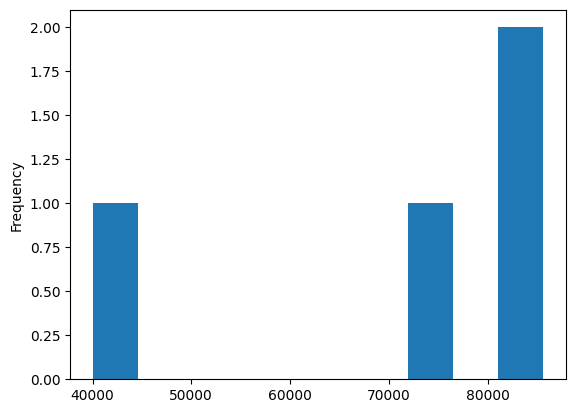

In [18]:
medias_por_status.plot(kind= "hist")

<Axes: ylabel='Budget'>

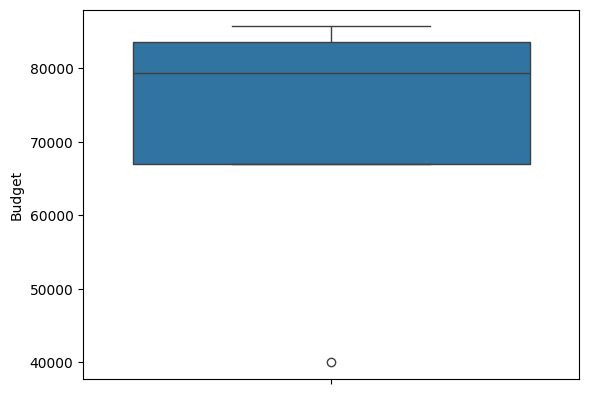

In [19]:
sns.boxplot(medias_por_status)

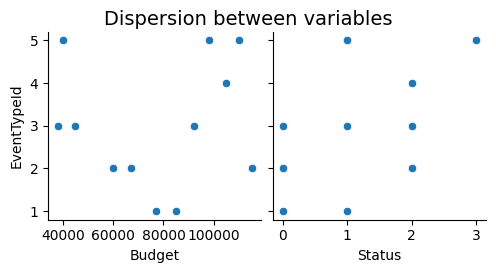

In [20]:

Bax = sns.pairplot(dados, y_vars='EventTypeId', x_vars=['Budget', 'Status'])
Bax.fig.suptitle('Dispersion between variables', fontsize=14, y=1.05)
Bax

In [37]:
# Seleção de atributos (Dados de entrada)
# Com o método .iloc selecionamos (por índice) todas as linhas,
# e as colunas de 0 a 13 (o segundo parâmetro é excludente)
X = dados.iloc[:, 0:9].values
X

array([['Encontro de Inovações Farmacêuticas', 1, 4, 2,
        Timestamp('2024-01-10 09:00:00'),
        Timestamp('2024-01-10 12:30:00'), 'Atualizar farmacêuticos', 1,
        0],
       ['Congresso Nacional de Saúde Pública', 2, 3, 1,
        Timestamp('2024-02-05 08:00:00'),
        Timestamp('2024-02-05 16:00:00'), 'Promover saúde pública', 0, 2],
       ['Simpósio de Terapias Oncológicas', 3, 1, 3,
        Timestamp('2024-03-15 14:00:00'),
        Timestamp('2024-03-15 18:00:00'), 'Compartilhar novas terapias',
        2, 1],
       ['Feira Internacional de Equipamentos Médicos', 5, 5, 6,
        Timestamp('2024-04-20 09:30:00'),
        Timestamp('2024-04-20 17:00:00'), 'Expor novas tecnologias', 1,
        0],
       ['Celebração de 10 Anos de Excelência Médica', 4, 2, 4,
        Timestamp('2024-05-18 19:00:00'),
        Timestamp('2024-05-18 23:00:00'), 'Comemorar conquistas', 2, 0],
       ['Seminário de Novas Tecnologias Cardiovasculares', 1, 3, 3,
        Timestamp('2024-06

In [36]:
y = dados.iloc[:, 8].values
y

array([0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0])